## Question 1.

### Part A

In [74]:
# load the dataset
data <- read.csv(url("https://course-resources.minerva.kgi.edu/uploaded_files/mke/00089202-1711/daughters.csv"))

In [77]:
# build a regression model with dependent variable 'newtot' and 7 other independent variables
lm1 <- glm(nowtot~hasgirls+Dems+Repubs+Christian+age+srvlng+demvote, data=data)

In [78]:
# show the regression specification
summary(lm1)


Call:
glm(formula = nowtot ~ hasgirls + Dems + Repubs + Christian + 
    age + srvlng + demvote, data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-56.028  -10.322   -1.517   11.208   69.642  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  38.6991    18.6306   2.077 0.038390 *  
hasgirls     -0.4523     1.9036  -0.238 0.812322    
Dems         -8.1022    17.5861  -0.461 0.645238    
Repubs      -55.1069    17.6340  -3.125 0.001901 ** 
Christian   -13.3961     3.7218  -3.599 0.000357 ***
age           0.1260     0.1117   1.128 0.259938    
srvlng       -0.2251     0.1355  -1.662 0.097349 .  
demvote      87.5501     8.4847  10.319  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 295.5316)

    Null deviance: 572224  on 429  degrees of freedom
Residual deviance: 124714  on 422  degrees of freedom
AIC: 3676.4

Number of Fisher Scoring iter

In [79]:
# estimate treatment effect
lm1$coefficients['hasgirls']

hasgirls 
-0.4522678

In [80]:
#find confidence interval
confint(lm1,'hasgirls',level=0.95)

Waiting for profiling to be done...



2.5 %    97.5 % 
-4.183329  3.278793

- From the regression above, we can find out that the treatment effect is around -0.4522. However, when we look at the Pr(>|t|) column, the value for 'hasgirls' is 0.8123, which is much greater than the significance level (α=0.05). In other words, the p-value associated with the value in the t value column for 'hasgirsls' does not have a statistically significant relationship with the response variable 'nowtot'. Also, the fact that the 95% confidence interval is (-4.1833, 3,2787) including zero, signifies that the treatment effect is not statistically significant.

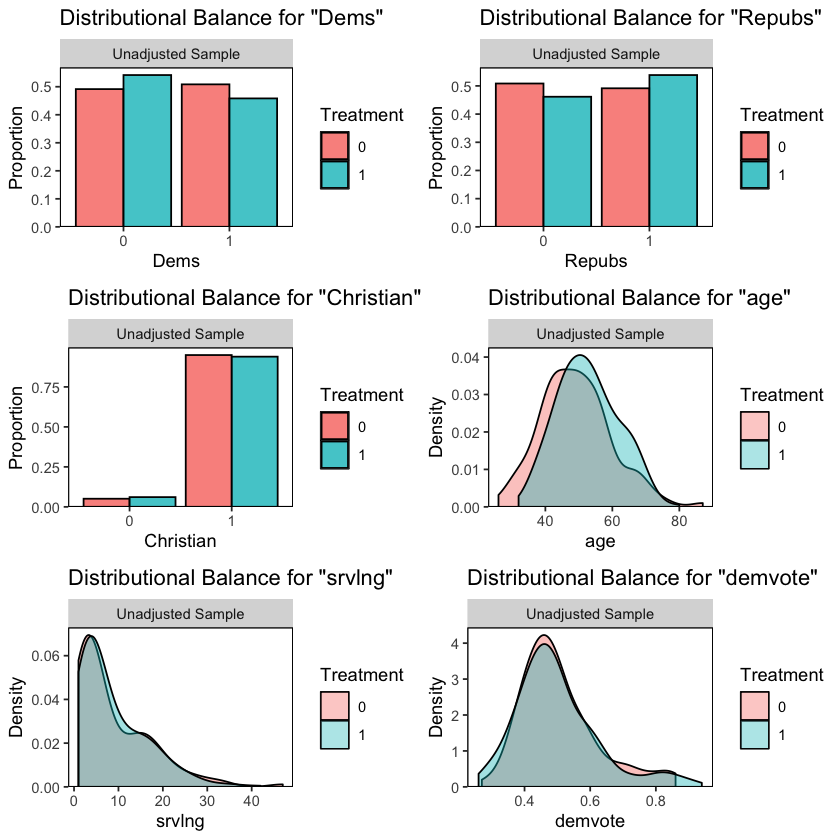

In [81]:
# Visualize the balance for each covariate

library(WeightIt)
library(cobalt)
library(gridExtra)

w.out_daughter <- weightit(hasgirls ~ Dems + Repubs + Christian + age + srvlng + demvote, data=data)

plot1 = bal.plot(w.out_daughter, "Dems", which = "unadjusted")
plot2 = bal.plot(w.out_daughter, "Repubs", which = "unadjusted")
plot3 = bal.plot(w.out_daughter, "Christian", which = "unadjusted")
plot4 = bal.plot(w.out_daughter, "age", which = "unadjusted")
plot5 = bal.plot(w.out_daughter, "srvlng", which = "unadjusted")
plot6 = bal.plot(w.out_daughter, "demvote", which = "unadjusted")


grid.arrange(plot1, plot2, plot3, plot4, plot5, plot6, nrow = 3)

In [160]:
# check the balance before matching

library(Matching)
MatchBalance(hasgirls ~ Dems + Repubs + Christian + age + srvlng + demvote, data=data)


***** (V1) Dems *****
before matching:
mean treatment........ 0.45833 
mean control.......... 0.50847 
std mean diff......... -10.047 

mean raw eQQ diff..... 0.050847 
med  raw eQQ diff..... 0 
max  raw eQQ diff..... 1 

mean eCDF diff........ 0.025071 
med  eCDF diff........ 0.025071 
max  eCDF diff........ 0.050141 

var ratio (Tr/Co)..... 0.98809 
T-test p-value........ 0.35571 


***** (V2) Repubs *****
before matching:
mean treatment........ 0.53846 
mean control.......... 0.49153 
std mean diff......... 9.4 

mean raw eQQ diff..... 0.042373 
med  raw eQQ diff..... 0 
max  raw eQQ diff..... 1 

mean eCDF diff........ 0.023468 
med  eCDF diff........ 0.023468 
max  eCDF diff........ 0.046936 

var ratio (Tr/Co)..... 0.98911 
T-test p-value........ 0.3873 


***** (V3) Christian *****
before matching:
mean treatment........ 0.9391 
mean control.......... 0.94915 
std mean diff......... -4.1958 

mean raw eQQ diff..... 0.016949 
med  raw eQQ diff..... 0 
max  raw eQQ diff..... 1 



- First, I used the cobalt library to make balance plots for each independent variable we have. We can identify that 'svrlng', 'demvote', 'Christian' are very well balanced and the balances for 'Dems', 'Repubs' are decent. However, there is a distinct difference for 'age'. Using MatchBalance function, we can identify the minimum p-value for 'age' is < 2.22e-16, which is much smaller than the significance level. This means that there is a significant difference between the treatment and the control group.

In [161]:
set.seed(2324)
Y = data$nowtot
Tr = data$hasgirls
X = cbind(data$Dems, data$Repubs, data$Christian, data$age, data$srvlng, data$demvote)
genout <- GenMatch(Tr=Tr, X=X, pop.size=20, nboots=250, M=1)



Thu Apr  7 21:10:21 2022
Domains:
 0.000000e+00   <=  X1   <=    1.000000e+03 
 0.000000e+00   <=  X2   <=    1.000000e+03 
 0.000000e+00   <=  X3   <=    1.000000e+03 
 0.000000e+00   <=  X4   <=    1.000000e+03 
 0.000000e+00   <=  X5   <=    1.000000e+03 
 0.000000e+00   <=  X6   <=    1.000000e+03 

Data Type: Floating Point
Operators (code number, name, population) 
	(1) Cloning........................... 	5
	(2) Uniform Mutation.................. 	2
	(3) Boundary Mutation................. 	2
	(4) Non-Uniform Mutation.............. 	2
	(5) Polytope Crossover................ 	2
	(6) Simple Crossover.................. 	2
	(7) Whole Non-Uniform Mutation........ 	2
	(8) Heuristic Crossover............... 	2
	(9) Local-Minimum Crossover........... 	0

SOFT Maximum Number of Generations: 100
Maximum Nonchanging Generations: 4
Population size       : 20
Convergence Tolerance: 1.000000e-03

Not Using the BFGS Derivative Based Optimizer on the Best Individual Each Generation.
Not Checkin

In [162]:
mout <- Match(Y=Y, Tr=Tr, X=X, M=1, Weight.matrix=genout)
summary(mout)


Estimate...  1.0737 
AI SE......  2.213 
T-stat.....  0.48519 
p.val......  0.62754 

Original number of observations..............  430 
Original number of treated obs...............  312 
Matched number of observations...............  312 
Matched number of observations  (unweighted).  312 



In [163]:
MatchBalance(hasgirls ~ Dems + Repubs + Christian + age + srvlng + demvote, match.out=mout, data=data, nboots=250)


***** (V1) Dems *****
                       Before Matching 	 	 After Matching
mean treatment........    0.45833 	 	    0.45833 
mean control..........    0.50847 	 	    0.46154 
std mean diff.........    -10.047 	 	   -0.64223 

mean raw eQQ diff.....   0.050847 	 	  0.0032051 
med  raw eQQ diff.....          0 	 	          0 
max  raw eQQ diff.....          1 	 	          1 

mean eCDF diff........   0.025071 	 	  0.0016026 
med  eCDF diff........   0.025071 	 	  0.0016026 
max  eCDF diff........   0.050141 	 	  0.0032051 

var ratio (Tr/Co).....    0.98809 	 	    0.99897 
T-test p-value........    0.35571 	 	    0.31731 


***** (V2) Repubs *****
                       Before Matching 	 	 After Matching
mean treatment........    0.53846 	 	    0.53846 
mean control..........    0.49153 	 	    0.53846 
std mean diff.........        9.4 	 	          0 

mean raw eQQ diff.....   0.042373 	 	          0 
med  raw eQQ diff.....          0 	 	          0 
max  raw eQQ diff.....         

- We first run GenMatch() function to match the control group that doesn't have girls and the treatment group that has girls. Here, we are trying to obtain the best weights for the six covariates by finding the highest p-value for the worst balanced variable. Then we run Match() function using the weights already calculated before. The last step is checking the balance to see if matching really improved the balance. After matching, we can see the minimum p-value is 0.31731 (for 'Dems'), which is definitely higher than 2.22e-16 (for 'age') and the significance level. Now we have no covariate that has a statistically significant difference because the minimum p-value is larger than the significance level. However, we still have some issues when we look at the summary of the match result. The treatment effect is estimated as 1.0737 with a standard error of 2.213 and a p-value of 0.62754. Therefore, it is difficult to conclude that this result is statistically significant.

### Part B

In [196]:
# create new dataset with different definitions for treatment and control

treatment <- data[data$ngirls >= 2 & data$nboys == 0, ]
control <- data[data$nboys >= 2 & data$ngirls == 0, ]
new_data <- rbind(treatment, control)
new_data$treat <- ifelse(new_data$ngirls>=2, 1, 0)

In [191]:
# build a regression model with dependent variable 'newtot' and 7 other independent variables
lm_new <- glm(nowtot~treat+Dems+Repubs+Christian+age+srvlng+demvote, data=new_data)

# show the regression specification
summary(lm_new)


Call:
glm(formula = nowtot ~ treat + Dems + Repubs + Christian + age + 
    srvlng + demvote, data = new_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-51.636   -6.608    0.928    8.992   46.235  

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -18.4332    16.3697  -1.126  0.26335    
treat        12.2925     3.5008   3.511  0.00072 ***
Dems         49.9284     4.4002  11.347  < 2e-16 ***
Repubs            NA         NA      NA       NA    
Christian    -3.4303     7.7211  -0.444  0.65798    
age          -0.2558     0.2180  -1.173  0.24395    
srvlng        0.3908     0.2654   1.473  0.14461    
demvote      86.6631    17.9813   4.820 6.32e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 250.1287)

    Null deviance: 130523  on 90  degrees of freedom
Residual deviance:  21011  on 84  degrees of freedom
AI

In [192]:
# estimate treatment effect
lm_new$coefficients['treat']

treat 
12.29254

In [193]:
# find the confidence interval
confint(lm_new,'treat',level=0.95)


Waiting for profiling to be done...



2.5 %    97.5 % 
 5.431158 19.153927

- In the first cell of Part B, we assigned the rows that have at least two girls/no boys as treatment and the rows with at least two boys/no girls as control. Then we combined those rows as new_data and added a column called 'treat' to distinguish whether each row belongs to the treatment or the control group. The regression above shows that the treatment effect is around 12.2925. When we look at the Pr(>|t|) column, the value for 'treat' is 0.00072. Therefore, the p-value associated with the value in the t value column for 'treat' has a statistically significant relationship with the response variable 'nowtot'. The 95% confident interval is (5.4312, 19.1539), meaning that there is a clear positive treatment effect.

In [197]:
# check the balance before matching

MatchBalance(treat ~ Dems + Repubs + Christian + age + srvlng + demvote, data=new_data)


***** (V1) Dems *****
before matching:
mean treatment........ 0.61702 
mean control.......... 0.40909 
std mean diff......... 42.317 

mean raw eQQ diff..... 0.20455 
med  raw eQQ diff..... 0 
max  raw eQQ diff..... 1 

mean eCDF diff........ 0.10397 
med  eCDF diff........ 0.10397 
max  eCDF diff........ 0.20793 

var ratio (Tr/Co)..... 0.97609 
T-test p-value........ 0.04806 


***** (V2) Repubs *****
before matching:
mean treatment........ 0.38298 
mean control.......... 0.59091 
std mean diff......... -42.317 

mean raw eQQ diff..... 0.22727 
med  raw eQQ diff..... 0 
max  raw eQQ diff..... 1 

mean eCDF diff........ 0.10397 
med  eCDF diff........ 0.10397 
max  eCDF diff........ 0.20793 

var ratio (Tr/Co)..... 0.97609 
T-test p-value........ 0.04806 


***** (V3) Christian *****
before matching:
mean treatment........ 0.91489 
mean control.......... 0.97727 
std mean diff......... -22.116 

mean raw eQQ diff..... 0.068182 
med  raw eQQ diff..... 0 
max  raw eQQ diff..... 1 

mea

- From MatchBalance function, we can identify the minimum p-value for 'Dems' is 0.04806, which is right on the edge of the significance level. The value is still smaller than 0.05, so it is possible to conclude that there is a significant difference between the treatment and the control group.

In [168]:
set.seed(2324)
Y_new = new_data$nowtot
Tr_new = new_data$treat
X_new = cbind(new_data$Dems, new_data$Repubs, new_data$Christian, new_data$age, new_data$srvlng, new_data$demvote)
new_genout <- GenMatch(Tr=Tr_new, X=X_new, pop.size=20, nboots=250, M=1)





Thu Apr  7 21:11:12 2022
Domains:
 0.000000e+00   <=  X1   <=    1.000000e+03 
 0.000000e+00   <=  X2   <=    1.000000e+03 
 0.000000e+00   <=  X3   <=    1.000000e+03 
 0.000000e+00   <=  X4   <=    1.000000e+03 
 0.000000e+00   <=  X5   <=    1.000000e+03 
 0.000000e+00   <=  X6   <=    1.000000e+03 

Data Type: Floating Point
Operators (code number, name, population) 
	(1) Cloning........................... 	5
	(2) Uniform Mutation.................. 	2
	(3) Boundary Mutation................. 	2
	(4) Non-Uniform Mutation.............. 	2
	(5) Polytope Crossover................ 	2
	(6) Simple Crossover.................. 	2
	(7) Whole Non-Uniform Mutation........ 	2
	(8) Heuristic Crossover............... 	2
	(9) Local-Minimum Crossover........... 	0

SOFT Maximum Number of Generations: 100
Maximum Nonchanging Generations: 4
Population size       : 20
Convergence Tolerance: 1.000000e-03

Not Using the BFGS Derivative Based Optimizer on the Best Individual Each Generation.
Not Checkin

In [169]:
new_mout <- Match(Y=Y_new, Tr=Tr_new, X=X_new, M=1, Weight.matrix=new_genout)
summary(new_mout)


Estimate...  11.383 
AI SE......  4.0247 
T-stat.....  2.8283 
p.val......  0.0046797 

Original number of observations..............  91 
Original number of treated obs...............  47 
Matched number of observations...............  47 
Matched number of observations  (unweighted).  47 



In [170]:
MatchBalance(treat ~ Dems + Repubs + Christian + age + srvlng + demvote, match.out=new_mout, data=new_data, nboots=250)


***** (V1) Dems *****
                       Before Matching 	 	 After Matching
mean treatment........    0.61702 	 	    0.61702 
mean control..........    0.40909 	 	    0.61702 
std mean diff.........     42.317 	 	          0 

mean raw eQQ diff.....    0.20455 	 	          0 
med  raw eQQ diff.....          0 	 	          0 
max  raw eQQ diff.....          1 	 	          0 

mean eCDF diff........    0.10397 	 	          0 
med  eCDF diff........    0.10397 	 	          0 
max  eCDF diff........    0.20793 	 	          0 

var ratio (Tr/Co).....    0.97609 	 	          1 
T-test p-value........    0.04806 	 	          1 


***** (V2) Repubs *****
                       Before Matching 	 	 After Matching
mean treatment........    0.38298 	 	    0.38298 
mean control..........    0.59091 	 	    0.38298 
std mean diff.........    -42.317 	 	          0 

mean raw eQQ diff.....    0.22727 	 	          0 
med  raw eQQ diff.....          0 	 	          0 
max  raw eQQ diff.....         

- We first run GenMatch function to match the control group that has at least two boys/no girls and the treatment group that has at least two girls/no boys. Here, we are trying to obtain the best weights for the six covariates by finding the highest p-value for the worst balanced variable. Then we run Match() function using the weights already calculated before. The last step is checking the balance to see if matching really improved the balance. After matching, we can see the minimum p-value is 0.44246 (for 'demvote'), which is definitely higher than 0.04806 (for 'Dems') and the significance level. Now we have no covariate that has a statistically significant difference because the minimum p-value is larger than the significance level. When we look at the summary of the match result, the treatment effect is estimated as 11.283 with a standard error of 4.0247 and a p-value of 0.00467. Therefore, we can conclude that this result is statistically significant.

## Question 3

In [172]:
library(sensitivitymv)

In [173]:
# the function below was imported from a link I found from googling
# https://nbviewer.org/gist/viniciusmss/a156c3f22081fb5c690cdd58658f61fa

# Generate the table of matched set outcomes
make_ymat<-function(matches, y){
  
  # Get indices of treated and control units
  treated <- unique(matches[, 1]) # Remove repeated indices
  controls <- matches[, 2]        # Keep repeated indices

  # Get outcomes of control units
  y_ctrls <- y[controls]
  
  # Create a table to check how many matches for each control  
  trt_table <- table(treated)
  
  # Get number of sets and size of largest set
  n_sets <- length(trt_table)
  max_ctrls <- max(trt_table)
  
  # Smallest table necessary is number of sets vs. size of largest set
  y_mat <- matrix(NA, n_sets, max_ctrls + 1)
  
  m <- 0 # Auxiliary indexer that will run linearly through the matches sets
  
  # For each set
  for (i in 1:n_sets){
    
    y_mat[i, 1] <- y[treated[i]] # Get treated outcome
    
    # Get controls outcomes
    y_mat[i, 2:(1+trt_table[i])] <- y_ctrls[(m+1):(m+trt_table[i])]
    
    # Advance the indexer
    m <- m + trt_table[i]
  }
  y_mat
}

In [174]:
ymat <- make_ymat(genout$matches, Y)

In [195]:
# run sensitivity test using different Gamma values
for (gamma in seq(1, 2.5, 0.1)) 
    cat(sprintf("Gamma: %.1f\tp-val: %.5f\n", 
                gamma, senmv(y=ymat, gamma=gamma, method='t')$pval))

Gamma: 1.0	p-val: 0.20379
Gamma: 1.1	p-val: 0.39408
Gamma: 1.2	p-val: 0.59541
Gamma: 1.3	p-val: 0.76151
Gamma: 1.4	p-val: 0.87432
Gamma: 1.5	p-val: 0.93994
Gamma: 1.6	p-val: 0.97362
Gamma: 1.7	p-val: 0.98922
Gamma: 1.8	p-val: 0.99586
Gamma: 1.9	p-val: 0.99849
Gamma: 2.0	p-val: 0.99948
Gamma: 2.1	p-val: 0.99983
Gamma: 2.2	p-val: 0.99994
Gamma: 2.3	p-val: 0.99998
Gamma: 2.4	p-val: 0.99999
Gamma: 2.5	p-val: 1.00000


In [177]:
ymat_new <- make_ymat(new_genout$matches, Y_new) 

In [179]:
# run sensitivity test using different Gamma values
for (gamma in seq(1, 2.5, 0.1)) 
    cat(sprintf("Gamma: %.1f\tp-val: %.5f\n", 
                gamma, senmv(y=ymat_new, gamma=gamma, method='t')$pval))

Gamma: 1.0	p-val: 0.00044
Gamma: 1.1	p-val: 0.00103
Gamma: 1.2	p-val: 0.00208
Gamma: 1.3	p-val: 0.00377
Gamma: 1.4	p-val: 0.00629
Gamma: 1.5	p-val: 0.00977
Gamma: 1.6	p-val: 0.01437
Gamma: 1.7	p-val: 0.02017
Gamma: 1.8	p-val: 0.02724
Gamma: 1.9	p-val: 0.03561
Gamma: 2.0	p-val: 0.04528
Gamma: 2.1	p-val: 0.05623
Gamma: 2.2	p-val: 0.06839
Gamma: 2.3	p-val: 0.08170
Gamma: 2.4	p-val: 0.09609
Gamma: 2.5	p-val: 0.11145


- Even after the matching process, it is highly likely that there are other covariates that are confounding the treatment and the dependent variables. However, it is impossible to identify and control every single of them in an observational study. So we run a sensitivity analysis to figure out how much hidden bias can be present. The sensitivity analysis assumes that two subjects who look identical before the treatment might differ in terms of unobserved covariates, thus having Gamma (odds of treatment) bigger than 1. In RCT, every subject has the same chance of treatment, so Gamma=1. The sensitivity analysis checks how large can Gamma be before the qualitative conclusions of the study begin to change. Here, I tried out 25 different Gamma values ranging from 1 to 2.5. For the original result from Part A, the p-value starts exceeding 0.05 even at Gamma=1. Therefore, the study is not robust to hidden bias. On the other hand, the new result from Part B has a critical Gamma value of 2.1. This signifies that a subject needs to be 2.1 times more likely to be in the treatment group than others for the conclusions of the study to be changed. Therefore, we can conclude that the new study is resilient to hidden bias.